<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Chapter-1---Exploring-Tick,-Volume,-DV-Bars" data-toc-modified-id="Chapter-1---Exploring-Tick,-Volume,-DV-Bars-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Chapter 1 - Exploring Tick, Volume, DV Bars</a></span><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#Read-and-Clean-Data" data-toc-modified-id="Read-and-Clean-Data-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Read and Clean Data</a></span></li><li><span><a href="#Remove-Obvious-Price-Errors-in-Tick-Data" data-toc-modified-id="Remove-Obvious-Price-Errors-in-Tick-Data-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Remove Obvious Price Errors in Tick Data</a></span></li></ul></li><li><span><a href="#Tick-Bars" data-toc-modified-id="Tick-Bars-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Tick Bars</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Bonus-Exercise:-Make-OHLC-Bars-from-Custom-Bars" data-toc-modified-id="Bonus-Exercise:-Make-OHLC-Bars-from-Custom-Bars-2.0.1"><span class="toc-item-num">2.0.1&nbsp;&nbsp;</span>Bonus Exercise: Make OHLC Bars from Custom Bars</a></span></li></ul></li></ul></li><li><span><a href="#Volume-Bars" data-toc-modified-id="Volume-Bars-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Volume Bars</a></span></li><li><span><a href="#Dollar-Value-Bars" data-toc-modified-id="Dollar-Value-Bars-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Dollar Value Bars</a></span></li><li><span><a href="#Analyzing-the-Bars" data-toc-modified-id="Analyzing-the-Bars-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Analyzing the Bars</a></span><ul class="toc-item"><li><span><a href="#Count-Quantity-of-Bars-By-Each-Bar-Type-(Weekly)" data-toc-modified-id="Count-Quantity-of-Bars-By-Each-Bar-Type-(Weekly)-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Count Quantity of Bars By Each Bar Type (Weekly)</a></span></li><li><span><a href="#Which-Bar-Type-Has-Most-Stable-Counts?" data-toc-modified-id="Which-Bar-Type-Has-Most-Stable-Counts?-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Which Bar Type Has Most Stable Counts?</a></span></li><li><span><a href="#Which-Bar-Type-Has-the-Lowest-Serial-Correlation?" data-toc-modified-id="Which-Bar-Type-Has-the-Lowest-Serial-Correlation?-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Which Bar Type Has the Lowest Serial Correlation?</a></span></li><li><span><a href="#Partition-Bar-Series-into-Monthly,-Compute-Variance-of-Returns,-and-Variance-of-Variance" data-toc-modified-id="Partition-Bar-Series-into-Monthly,-Compute-Variance-of-Returns,-and-Variance-of-Variance-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>Partition Bar Series into Monthly, Compute Variance of Returns, and Variance of Variance</a></span></li><li><span><a href="#Compute-Jarque-Bera-Test,-Which-Has-Lowest-Test-Statistic?" data-toc-modified-id="Compute-Jarque-Bera-Test,-Which-Has-Lowest-Test-Statistic?-5.5"><span class="toc-item-num">5.5&nbsp;&nbsp;</span>Compute Jarque-Bera Test, Which Has Lowest Test Statistic?</a></span></li><li><span><a href="#Compute-Shapiro-Wilk-Test" data-toc-modified-id="Compute-Shapiro-Wilk-Test-5.6"><span class="toc-item-num">5.6&nbsp;&nbsp;</span>Compute Shapiro-Wilk Test</a></span></li></ul></li><li><span><a href="#Compare-Serial-Correlation-between-Dollar-and-Dollar-Imbalance-Bars" data-toc-modified-id="Compare-Serial-Correlation-between-Dollar-and-Dollar-Imbalance-Bars-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Compare Serial Correlation between Dollar and Dollar Imbalance Bars</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Update-[05.04.18]" data-toc-modified-id="Update-[05.04.18]-6.0.1"><span class="toc-item-num">6.0.1&nbsp;&nbsp;</span>Update [05.04.18]</a></span></li></ul></li></ul></li></ul></div>

Advances in Machine Learning

# Chapter 1 - Exploring Tick, Volume, DV Bars

In [1]:
#%load_ext watermark
#%watermark

#%load_ext autoreload
#%autoreload 2

#import standard libs
from IPython.display import display
#from IPython.core.debugger import set_trace as bp
from pathlib import PurePath, Path
import sys
import time
from collections import OrderedDict as od
import re
import os
import json


In [2]:
#os.environ['THEANO_FLAGS'] = 'device=cpu,floatX=float32'

# get project dir
pp = PurePath(Path.cwd()).parts[:-1]
pdir = PurePath(*pp)
script_dir = pdir / 'src' 
viz_dir = pdir / 'report' / 'figures'
data_dir = pdir / 'data'
script_dirs = list(Path(script_dir).glob('./*/'))
for sdir in script_dirs: sys.path.append(sdir.as_posix())

# import python scientific stack
import pandas as pd
import pandas_datareader.data as web
pd.set_option('display.max_rows', 100)
from dask import dataframe as dd
from dask.diagnostics import ProgressBar
pbar = ProgressBar()
pbar.register()
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
from numba import jit
import math
#import pymc3 as pm
#from theano import shared, theano as tt

# import visual tools
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline
import seaborn as sns

plt.style.use('seaborn-talk')
plt.style.use('bmh')

#plt.rcParams['font.family'] = 'DejaVu Sans Mono'
#plt.rcParams['font.size'] = 9.5
plt.rcParams['font.weight'] = 'medium'
#plt.rcParams['figure.figsize'] = 10,7
blue, green, red, purple, gold, teal = sns.color_palette('colorblind', 6)

# import util libs
import pyarrow as pa
import pyarrow.parquet as pq
from tqdm import tqdm, tqdm_notebook
import warnings
warnings.filterwarnings("ignore")
import missingno as msno
from utils import cprint
from bars import get_imbalance

RANDOM_STATE = 777

print()
#%watermark -p pandas,pandas_datareader,dask,numpy,pymc3,theano,sklearn,statsmodels,scipy,matplotlib,seaborn,pyarrow,fastparquet

## Introduction

This notebook explores the idea of sampling prices as a function of something other than fixed time intervals. For example using the number of ticks, volume or dollar volume traded as the sampling interval. The rest of this notebook works through some of the exercises found in chapters 1 and 2 of the book. 

This notebook makes use of the following script found here: `./src/features/bars.py`

## Read and Clean Data

The data set used in this example is too large to be hosted on github. It is a sample of equity tick data, symbol `IVE`, provided by [kibot.com (caution: download link)](http://api.kibot.com/?action=history&symbol=IVE&interval=tickbidask&bp=1&user=guest). Download this data to the `./data/raw/` directory in your local repo.

In [3]:
def read_kibot_ticks(fp):
    # read tick data from http://www.kibot.com/support.aspx#data_format
    cols = list(map(str.lower,['Date','Time','Price','Bid','Ask','Size']))
    df = (pd.read_csv(fp, header=None)
          .rename(columns=dict(zip(range(len(cols)),cols)))
          .assign(dates=lambda df: (pd.to_datetime(df['date']+df['time'],
                                                  format='%m/%d/%Y%H:%M:%S')))
          .assign(v=lambda df: df['size']) # volume
          .assign(dv=lambda df: df['price']*df['size']) # dollar volume
          .drop(['date','time'],axis=1)
          .set_index('dates')
          .drop_duplicates())
    return df

infp = PurePath(data_dir/'raw'/'IVE_tickbidask.txt')
print(infp)
df = read_kibot_ticks(infp)
cprint(df)

/home/ale/py-projects/Adv_Fin_ML_Exercises/data/raw/IVE_tickbidask.txt
-------------------------------------------------------------------------------
dataframe information
-------------------------------------------------------------------------------
                      price     bid     ask   size      v          dv
dates                                                                
2018-10-19 15:59:59  111.96  111.95  111.96    900    900   100764.00
2018-10-19 16:00:00  111.97  111.95  111.96  12439  12439  1392794.83
2018-10-19 16:10:00  111.97  111.31  112.10      0      0        0.00
2018-10-19 18:30:00  111.97  110.70  112.40      0      0        0.00
2018-10-19 20:00:00  111.97  110.81  112.40      0      0        0.00
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1431009 entries, 2009-09-28 09:30:00 to 2018-10-19 20:00:00
Data columns (total 6 columns):
price    1431009 non-null float64
bid      1431009 non-null f

Save initial processed data as parquet in the `./data/interim/` folder and reload.

In [4]:
outfp = PurePath(data_dir/'interim'/'IVE_tickbidask.parq')
df.to_parquet(outfp)

In [5]:
infp=PurePath(data_dir/'interim'/'IVE_tickbidask.parq')
df = pd.read_parquet(infp)
cprint(df)

-------------------------------------------------------------------------------
dataframe information
-------------------------------------------------------------------------------
                      price     bid     ask   size      v          dv
dates                                                                
2018-10-19 15:59:59  111.96  111.95  111.96    900    900   100764.00
2018-10-19 16:00:00  111.97  111.95  111.96  12439  12439  1392794.83
2018-10-19 16:10:00  111.97  111.31  112.10      0      0        0.00
2018-10-19 18:30:00  111.97  110.70  112.40      0      0        0.00
2018-10-19 20:00:00  111.97  110.81  112.40      0      0        0.00
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1431009 entries, 2009-09-28 09:30:00 to 2018-10-19 20:00:00
Data columns (total 6 columns):
price    1431009 non-null float64
bid      1431009 non-null float64
ask      1431009 non-null float64
size     1431009 non-null int6

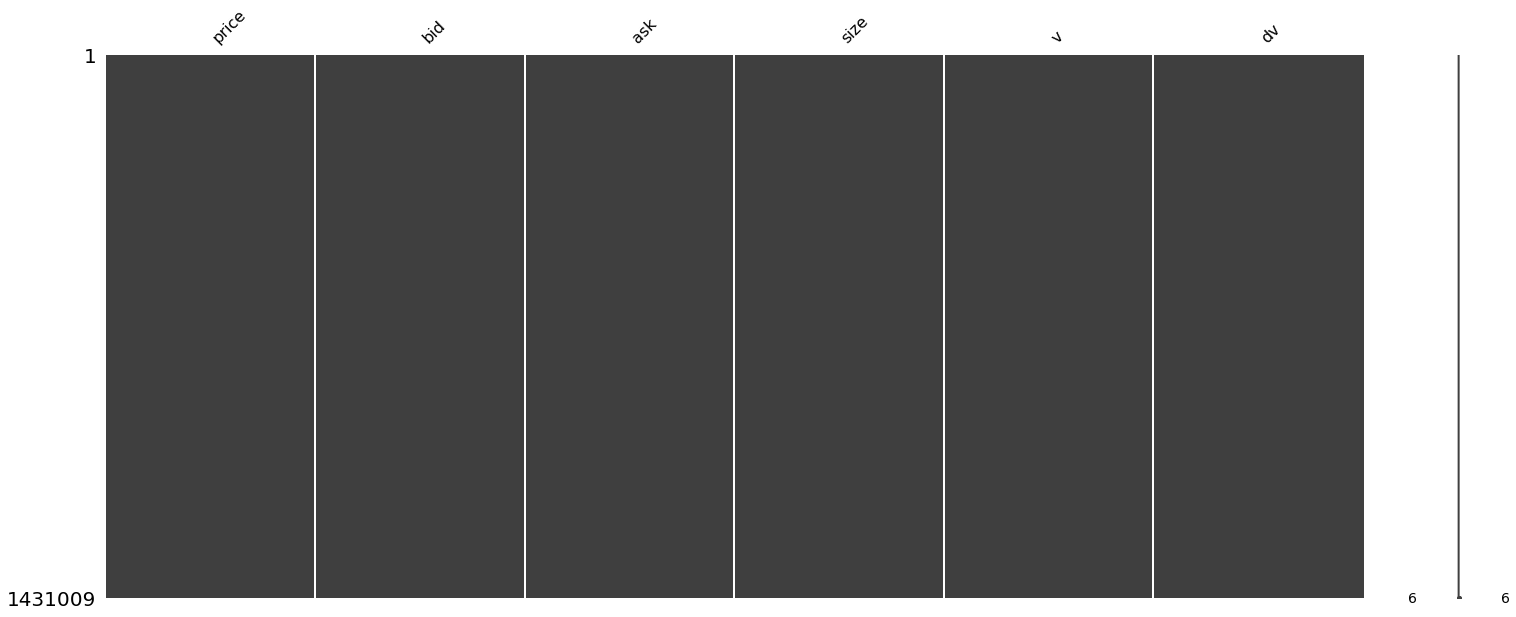

In [6]:
msno.matrix(df)

## Remove Obvious Price Errors in Tick Data

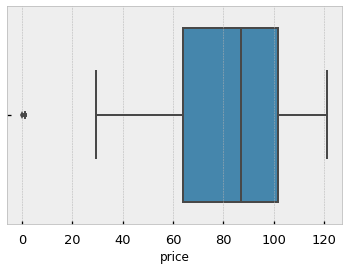

In [8]:
sns.boxplot(df.price)

In [7]:
@jit(nopython=True)
def mad_outlier(y, thresh=3.):
    '''
    compute outliers based on mad
    # args
        y: assumed to be array with shape (N,1)
        thresh: float()
    # returns
        array index of outliers
    '''
    median = np.median(y)
    diff = np.sum((y - median)**2, axis=-1)
    diff = np.sqrt(diff)
    med_abs_deviation = np.median(diff)

    modified_z_score = 0.6745 * diff / med_abs_deviation

    return modified_z_score > thresh

In [8]:
mad = mad_outlier(df.price.values.reshape(-1,1))

In [9]:
df.loc[mad]

,price,bid,ask,size,v,dv
dates,,,,,,
2010-05-06 14:49:07,0.11,0.10,44.03,500,500,55.0
2010-05-06 14:53:30,1.10,1.10,30.28,2600,2600,2860.0
2010-05-06 14:55:32,1.10,1.10,50.57,300,300,330.0
2010-05-06 14:55:32,1.10,1.10,50.57,100,100,110.0
2010-05-06 14:55:32,1.10,1.00,50.57,200,200,220.0
2010-05-06 14:55:32,1.10,1.00,50.57,700,700,770.0
2010-05-06 14:55:32,1.10,1.00,50.57,1200,1200,1320.0
2010-05-06 14:55:32,1.10,0.55,50.57,500,500,550.0
2010-05-06 14:55:32,1.10,0.55,50.57,100,100,110.0


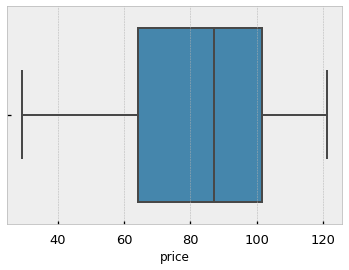

In [10]:
sns.boxplot(df.loc[~mad].price)

Drop outliers from dataset and save cleaned data in the `./data/processed/` folder.

In [11]:
df = df.loc[~mad]
cprint(df)

-------------------------------------------------------------------------------
dataframe information
-------------------------------------------------------------------------------
                      price     bid     ask   size      v          dv
dates                                                                
2018-10-19 15:59:59  111.96  111.95  111.96    900    900   100764.00
2018-10-19 16:00:00  111.97  111.95  111.96  12439  12439  1392794.83
2018-10-19 16:10:00  111.97  111.31  112.10      0      0        0.00
2018-10-19 18:30:00  111.97  110.70  112.40      0      0        0.00
2018-10-19 20:00:00  111.97  110.81  112.40      0      0        0.00
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1430998 entries, 2009-09-28 09:30:00 to 2018-10-19 20:00:00
Data columns (total 6 columns):
price    1430998 non-null float64
bid      1430998 non-null float64
ask      1430998 non-null float64
size     1430998 non-null int6

In [12]:
outfp = PurePath(data_dir/'processed'/'clean_IVE_fut_prices.parq')
df.to_parquet(outfp)

In [13]:
infp=PurePath(data_dir/'processed'/'clean_IVE_fut_prices.parq')
df = pd.read_parquet(infp)
cprint(df)

-------------------------------------------------------------------------------
dataframe information
-------------------------------------------------------------------------------
                      price     bid     ask   size      v          dv
dates                                                                
2018-10-19 15:59:59  111.96  111.95  111.96    900    900   100764.00
2018-10-19 16:00:00  111.97  111.95  111.96  12439  12439  1392794.83
2018-10-19 16:10:00  111.97  111.31  112.10      0      0        0.00
2018-10-19 18:30:00  111.97  110.70  112.40      0      0        0.00
2018-10-19 20:00:00  111.97  110.81  112.40      0      0        0.00
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1430998 entries, 2009-09-28 09:30:00 to 2018-10-19 20:00:00
Data columns (total 6 columns):
price    1430998 non-null float64
bid      1430998 non-null float64
ask      1430998 non-null float64
size     1430998 non-null int6

# Tick Bars

In [14]:
def tick_bars(df, price_column, m):
    '''
    compute tick bars

    # args
        df: pd.DataFrame()
        column: name for price data
        m: int(), threshold value for ticks
    # returns
        idx: list of indices
    '''
    t = df[price_column]
    ts = 0
    idx = []
    for i, x in enumerate(tqdm(t)):
        ts += 1
        if ts >= m:
            idx.append(i)
            ts = 0
            continue
    return idx

def tick_bar_df(df, price_column, m):
    idx = tick_bars(df, price_column, m)
    return df.iloc[idx].drop_duplicates()

There are many ways to choose `M`, or the threshold value for sampling prices. One way is based on ratios of total dollar value/volume traded vs number of ticks. The rest of the notebook uses an arbitrary but sensible `M` value. I leave it as an exercise for the reader to see how the results change based on different values of `M`.

In [15]:
n_ticks = df.shape[0]
volume_ratio = (df.v.sum()/n_ticks).round()
dollar_ratio = (df.dv.sum()/n_ticks).round()
print(f'num ticks: {n_ticks:,}')
print(f'volume ratio: {volume_ratio}')
print(f'dollar ratio: {dollar_ratio}')

num ticks: 1,430,998
volume ratio: 547.0
dollar ratio: 46603.0


In [18]:
tick_M = 200 # arbitrary
#print(f'tick threshold: {tick_M:,}')
tidx = tick_bars(df, 'price', tick_M)
tidx[:10]

100%|██████████| 1430998/1430998 [00:00<00:00, 2819576.35it/s]


[199, 399, 599, 799, 999, 1199, 1399, 1599, 1799, 1999]

In [19]:
df.iloc[tidx].shape, df.shape

((7154, 6), (1430998, 6))

Dataset is large so select smaller example for quick exploration

In [20]:
tick_df = tick_bar_df(df, 'price', tick_M)
tick_df.shape

100%|██████████| 1430998/1430998 [00:00<00:00, 2680673.17it/s]


(7154, 6)

In [21]:
cprint(tick_df)

-------------------------------------------------------------------------------
dataframe information
-------------------------------------------------------------------------------
                        price     bid     ask  size     v           dv
dates                                                                 
2018-10-19 09:30:00  111.8300  111.79  111.90  6055  6055  677130.6500
2018-10-19 11:34:22  112.3300  112.33  112.34   800   800   89864.0000
2018-10-19 12:56:39  112.1999  112.18  112.20   246   246   27601.1754
2018-10-19 14:12:12  111.9100  111.90  111.91   195   195   21822.4500
2018-10-19 15:27:25  112.1600  112.14  112.16   600   600   67296.0000
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7154 entries, 2009-09-28 10:02:52 to 2018-10-19 15:27:25
Data columns (total 6 columns):
price    7154 non-null float64
bid      7154 non-null float64
ask      7154 non-null float64
size     7154 non-null int64
v     

In [22]:
def select_sample_data(ref, sub, price_col, date):
    '''
    select a sample of data based on date, assumes datetimeindex
    
    # args
        ref: pd.DataFrame containing all ticks
        sub: subordinated pd.DataFrame of prices
        price_col: str(), price column
        date: str(), date to select
    # returns
        xdf: ref pd.Series
        xtdf: subordinated pd.Series
    '''
    xdf = ref[price_col].loc[date]
    xtdf = sub[price_col].loc[date]
    return xdf, xtdf

## try different dates to see how the quantity of tick bars changes
xDate ='2009-10-01' #'2017-10-4'
xdf, xtdf = select_sample_data(df, tick_df, 'price', xDate)

xdf.shape, xtdf.shape

((1466,), (8,))

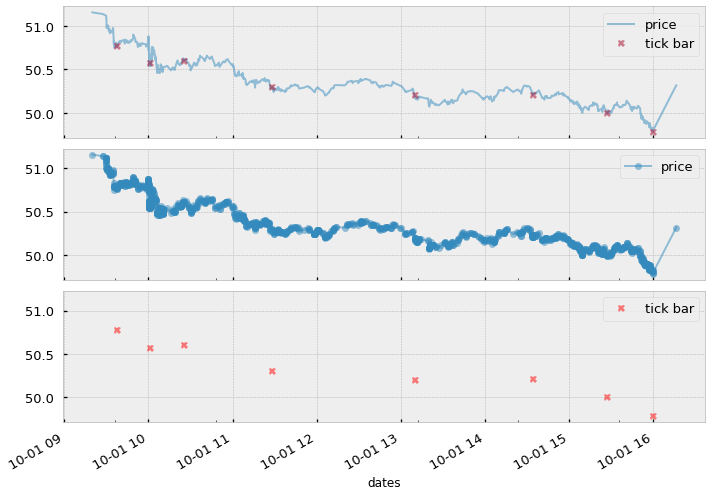

In [23]:
def plot_sample_data(ref, sub, bar_type, *args, **kwds):
    f,axes=plt.subplots(3,sharex=True, sharey=True, figsize=(10,7))
    ref.plot(*args, **kwds, ax=axes[0], label='price')
    sub.plot(*args, **kwds, ax=axes[0], marker='X', ls='', label=bar_type)
    axes[0].legend();
    
    ref.plot(*args, **kwds, ax=axes[1], label='price', marker='o')
    sub.plot(*args, **kwds, ax=axes[2], ls='', marker='X',
             color='r', label=bar_type)

    for ax in axes[1:]: ax.legend()
    plt.tight_layout()
    
    return

plot_sample_data(xdf, xtdf, 'tick bar', alpha=0.5, markersize=7)

### Bonus Exercise: Make OHLC Bars from Custom Bars

Extract `tick_df.price` and `df.price` into two pandas series.

In [24]:
sub = tick_df.price
ref = df.price

The function below creates the OHLC dataframe by:
    1. Iterating over the subordinated series' index extracting idx and idx+1 period
    2. Selecting the same date period from the reference series
    3. Extracting the max, min prices from the reference series.
    4. Combining the o,h,l,c and start and end timestamps into a row
    5. Returning the aggregated rows as a pandas dataframe.

In [25]:
def get_ohlc(ref, sub):
    '''
    fn: get ohlc from custom bars
    
    # args
        ref : reference pandas series with all prices
        sub : custom tick pandas series
    # returns
        tick_df : dataframe with ohlc values
    '''
    ohlc = []
    for i in tqdm(range(sub.index.shape[0]-1)):
        start,end = sub.index[i], sub.index[i+1]
        tmp_ref = ref.loc[start:end]
        max_px, min_px = tmp_ref.max(), tmp_ref.min()
        o,h,l,c = sub.iloc[i], max_px, min_px, sub.iloc[i+1]
        ohlc.append((end,start,o,h,l,c))
    cols = ['end','start','open','high','low','close']
    return (pd.DataFrame(ohlc,columns=cols))

## uncomment below to run (takes about 5-6 mins on my machine)
tick_bars_ohlc = get_ohlc(ref, sub)
cprint(tick_bars_ohlc)

outfp = PurePath(data_dir/'processed'/'tick_bars_ohlc.parq')
tick_bars_ohlc.to_parquet(outfp)

100%|██████████| 7153/7153 [00:02<00:00, 2699.74it/s]


-------------------------------------------------------------------------------
dataframe information
-------------------------------------------------------------------------------
                     end               start      open    high       low  \
7148 2018-10-19 09:30:00 2018-10-18 15:13:22  111.5065  112.01  111.4664   
7149 2018-10-19 11:34:22 2018-10-19 09:30:00  111.8300  112.78  111.8300   
7150 2018-10-19 12:56:39 2018-10-19 11:34:22  112.3300  112.64  112.0100   
7151 2018-10-19 14:12:12 2018-10-19 12:56:39  112.1999  112.45  111.7600   
7152 2018-10-19 15:27:25 2018-10-19 14:12:12  111.9100  112.26  111.8467   

         close  
7148  111.8300  
7149  112.3300  
7150  112.1999  
7151  111.9100  
7152  112.1600  
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7153 entries, 0 to 7152
Data columns (total 6 columns):
end      7153 non-null datetime64[ns]
start    7153 non-null datetime64[ns]
open     7153 non-null flo

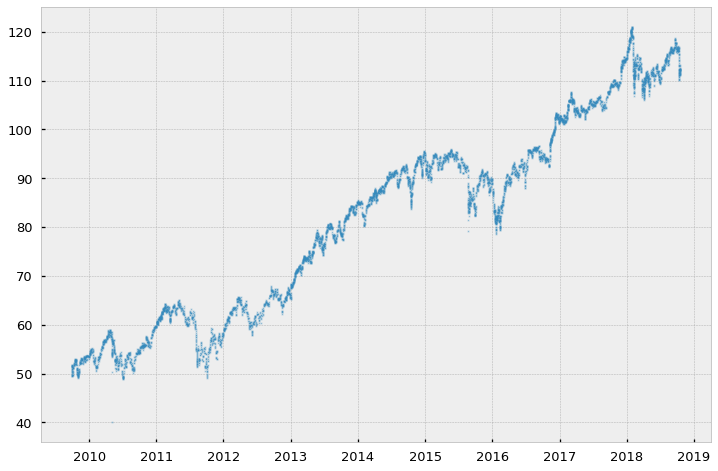

In [26]:
plt.figure(figsize=(12, 8))
#plt.plot(df.price, ls='-')
plt.plot(tick_df.price, ls='', marker='X', markersize=2, alpha=0.5)
plt.show()

# Volume Bars

In [27]:
def volume_bars(df, volume_column, m):
    '''
    compute volume bars

    # args
        df: pd.DataFrame()
        volume_column: name for volume data
        m: int(), threshold value for volume
    # returns
        idx: list of indices
    '''
    t = df[volume_column]
    ts = 0
    idx = []
    for i, x in enumerate(tqdm(t)):
        ts += x
        if ts >= m:
            idx.append(i)
            ts = 0
            continue
    return idx

def volume_bar_df(df, volume_column, m):
    idx = volume_bars(df, volume_column, m)
    return df.iloc[idx].drop_duplicates()

In [28]:
volume_M =  10_000 # arbitrary 
#print(f'volume threshold: {volume_M:,}')
v_bar_df = volume_bar_df(df, 'v', volume_M)
cprint(v_bar_df)

100%|██████████| 1430998/1430998 [00:00<00:00, 2700544.26it/s]

-------------------------------------------------------------------------------
dataframe information
-------------------------------------------------------------------------------
                      price     bid     ask   size      v          dv
dates                                                                
2018-10-19 15:57:50  112.09  112.08  112.09   1500   1500   168135.00
2018-10-19 15:59:09  111.99  111.99  112.00   2474   2474   277063.26
2018-10-19 15:59:37  111.96  111.96  111.97   4000   4000   447840.00
2018-10-19 15:59:59  111.96  111.95  111.96    866    866    96957.36
2018-10-19 16:00:00  111.97  111.95  111.96  12439  12439  1392794.83
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 60865 entries, 2009-09-28 09:44:09 to 2018-10-19 16:00:00
Data columns (total 6 columns):
price    60865 non-null float64
bid      60865 non-null float64
ask      60865 non-null float64
size     60865 non-null int64
v       

xdf shape: (1466,), xtdf shape: (48,)


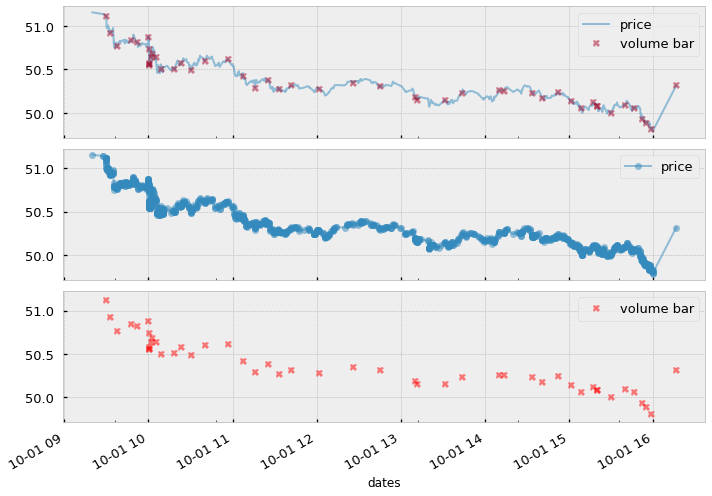

In [29]:
xDate = '2009-10-1'
xdf, xtdf = select_sample_data(df, v_bar_df, 'price', xDate)
print(f'xdf shape: {xdf.shape}, xtdf shape: {xtdf.shape}')

plot_sample_data(xdf, xtdf, 'volume bar', alpha=0.5, markersize=7)  

# Dollar Value Bars

In [30]:
def dollar_bars(df, dv_column, m):
    '''
    compute dollar bars

    # args
        df: pd.DataFrame()
        dv_column: name for dollar volume data
        m: int(), threshold value for dollars
    # returns
        idx: list of indices
    '''
    t = df[dv_column]
    ts = 0
    idx = []
    for i, x in enumerate(tqdm(t)):
        ts += x
        if ts >= m:
            idx.append(i)
            ts = 0
            continue
    return idx

def dollar_bar_df(df, dv_column, m):
    idx = dollar_bars(df, dv_column, m)
    return df.iloc[idx].drop_duplicates()

In [31]:
dollar_M = 1_000_000 # arbitrary 
#print(f'dollar threshold: {dollar_M:,}')
dv_bar_df = dollar_bar_df(df, 'dv', dollar_M)
cprint(dv_bar_df)

100%|██████████| 1430998/1430998 [00:00<00:00, 2621664.20it/s]

-------------------------------------------------------------------------------
dataframe information
-------------------------------------------------------------------------------
                      price     bid     ask   size      v          dv
dates                                                                
2018-10-19 15:57:50  112.09  112.08  112.09   1500   1500   168135.00
2018-10-19 15:59:07  112.01  112.00  112.01    306    306    34275.06
2018-10-19 15:59:37  111.96  111.96  111.97    313    313    35043.48
2018-10-19 15:59:58  111.97  111.96  111.98   1586   1586   177584.42
2018-10-19 16:00:00  111.97  111.95  111.96  12439  12439  1392794.83
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 51439 entries, 2009-09-28 09:46:35 to 2018-10-19 16:00:00
Data columns (total 6 columns):
price    51439 non-null float64
bid      51439 non-null float64
ask      51439 non-null float64
size     51439 non-null int64
v       

In [32]:
# Computationally really expensive
if(False):
    df0 = df.copy()
    print(df0.head())
    idx = df0.resample('1S', convention='end')
    df0 = df0.iloc[idx]
    df0 = df0[~df0.index.duplicated(keep='last')]
    outfp = PurePath(data_dir/'processed'/'IVE_dollarValue_resampled_1s.parquet')
    df0.to_parquet(outfp)

xdf shape: (1466,), xtdf shape: (26,)


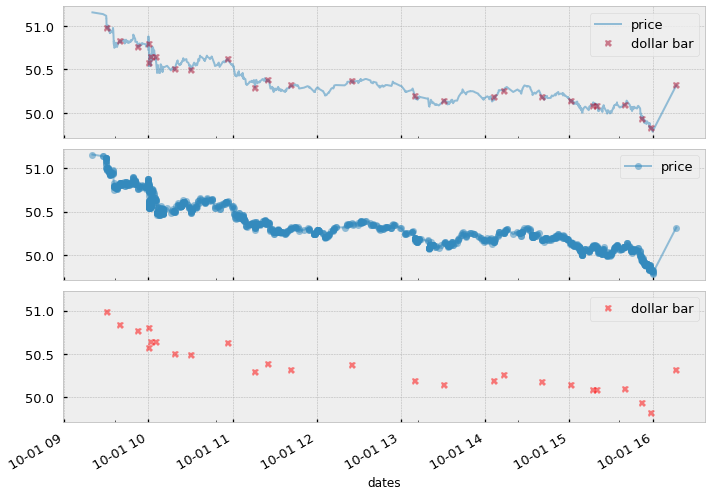

In [33]:
xDate = '2009-10-1'
xdf, xtdf = select_sample_data(df, dv_bar_df, 'price', xDate)
print(f'xdf shape: {xdf.shape}, xtdf shape: {xtdf.shape}')

plot_sample_data(xdf, xtdf, 'dollar bar', alpha=0.5, markersize=7)  

# Analyzing the Bars

## Count Quantity of Bars By Each Bar Type (Weekly)

In [34]:
def count_bars(df, price_col='price'):
    return df.groupby(pd.TimeGrouper('1W'))[price_col].count()

def scale(s):
    return (s-s.min())/(s.max()-s.min())

In [35]:
# count series
# scale to compare 'apples to apples'
tc = scale(count_bars(tick_df))
vc = scale(count_bars(v_bar_df))
dc = scale(count_bars(dv_bar_df))
dfc = scale(count_bars(df))

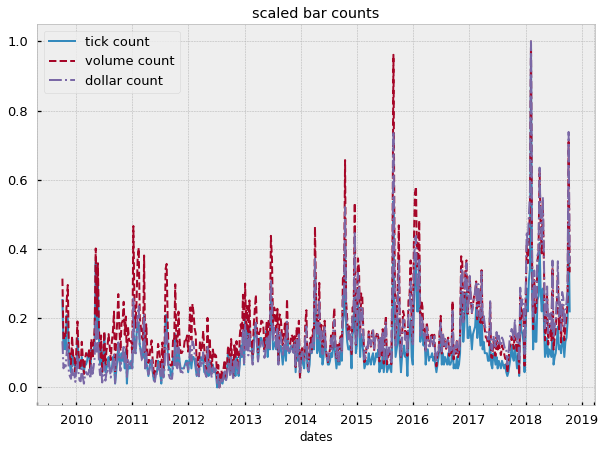

In [36]:
# plot time series of count

f,ax=plt.subplots(figsize=(10,7))

tc.plot(ax=ax, ls='-', label='tick count')
vc.plot(ax=ax, ls='--', label='volume count')
dc.plot(ax=ax, ls='-.', label='dollar count')

ax.set_title('scaled bar counts')
ax.legend()

## Which Bar Type Has Most Stable Counts?

In [37]:
print(f'tc std: {tc.std():.2%}, vc std: {vc.std():.2%}, dc std: {dc.std():.2%}')

bar_types = ['tick','volume','dollar','df']
bar_std = [tc.std(),vc.std(),dc.std(),dfc.std()]
counts = (pd.Series(bar_std,index=bar_types))
counts.sort_values()

tc std: 8.18%, vc std: 11.78%, dc std: 11.32%


tick      0.081775
df        0.082095
dollar    0.113185
volume    0.117814
dtype: float64

## Which Bar Type Has the Lowest Serial Correlation?

In [38]:
def returns(s):
    arr = np.diff(np.log(s))
    return (pd.Series(arr, index=s.index[1:]))

In [39]:
tr = returns(tick_df.price)
vr = returns(v_bar_df.price)
dr = returns(dv_bar_df.price)
df_ret = returns(df.price)   

bar_returns = [tr, vr, dr, df_ret]

In [40]:
bar_types = ['tick','volume','dollar']
bar_autocorr = [tc.autocorr(),vc.autocorr(),dc.autocorr()]
autocorrs = (pd.Series(bar_autocorr,index=bar_types))
autocorrs.sort_values()

tick      0.511512
volume    0.522661
dollar    0.685738
dtype: float64

In [41]:
def get_test_stats(bar_types,bar_returns,test_func,*args,**kwds):
    
    dct = {bar:(int(bar_ret.shape[0]), test_func(bar_ret,*args,**kwds)) 
           for bar,bar_ret in zip(bar_types,bar_returns)}
    df = (pd.DataFrame.from_dict(dct)
          .rename(index={0:'sample_size',1:f'{test_func.__name__}_stat'})
          .T)
    return df

autocorrs = get_test_stats(bar_types,bar_returns,pd.Series.autocorr)
display(autocorrs.sort_values('autocorr_stat'),
        autocorrs.abs().sort_values('autocorr_stat'))

,sample_size,autocorr_stat
tick,7153.0,-0.132122
dollar,51438.0,-0.122732
volume,60864.0,-0.017535


,sample_size,autocorr_stat
volume,60864.0,0.017535
dollar,51438.0,0.122732
tick,7153.0,0.132122


In [42]:
def plot_autocorr(bar_types,bar_returns):
    f,axes=plt.subplots(len(bar_types),figsize=(10,7), sharey=True)

    for i, (bar, typ) in enumerate(zip(bar_returns, bar_types)):
        sm.graphics.tsa.plot_acf(bar, lags=120, ax=axes[i],
                                 alpha=0.05, unbiased=True, fft=True,
                                 zero=False,
                                 title=f'{typ} AutoCorr')
    plt.tight_layout()   
    
def plot_hist(bar_types,bar_rets):
    f,axes=plt.subplots(len(bar_types),figsize=(10,6))
    for i, (bar, typ) in enumerate(zip(bar_returns, bar_types)):
        g = sns.distplot(bar, ax=axes[i], kde=False, label=typ)
        g.set(yscale='log')
        axes[i].legend()
    plt.tight_layout()     

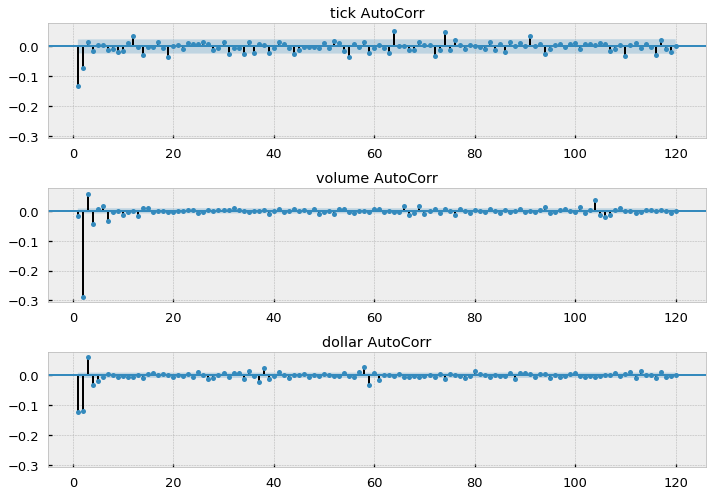

In [43]:
 plot_autocorr(bar_types,bar_returns)

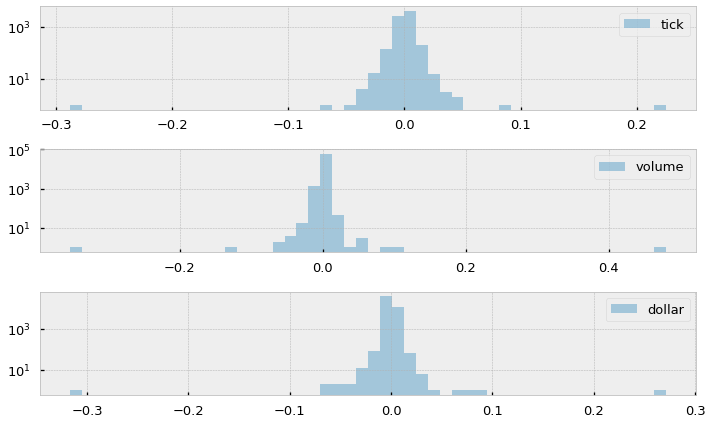

In [45]:
plot_hist(bar_types,bar_returns)

## Partition Bar Series into Monthly, Compute Variance of Returns, and Variance of Variance

In [46]:
def partition_monthly(s):
    return s.resample('1M').var()

In [47]:
tr_rs = partition_monthly(tr)
vr_rs = partition_monthly(vr)
dr_rs = partition_monthly(dr)
df_ret_rs = partition_monthly(df_ret)
monthly_vars = [tr_rs, vr_rs, dr_rs, df_ret_rs]

In [48]:
get_test_stats(bar_types,monthly_vars,np.var).sort_values('var_stat')

,sample_size,var_stat
dollar,110.0,2.099164e-09
volume,110.0,2.710072e-09
tick,110.0,1.825414e-08


## Compute Jarque-Bera Test, Which Has Lowest Test Statistic?

In [49]:
def jb(x,test=True): 
    np.random.seed(12345678)
    if test: return stats.jarque_bera(x)[0]
    return stats.jarque_bera(x)[1]

get_test_stats(bar_types,bar_returns,jb).sort_values('jb_stat')

,sample_size,jb_stat
tick,7153.0,1.127301e+08
dollar,51438.0,5.559126e+10
volume,60864.0,3.349965e+11


## Compute Shapiro-Wilk Test

Shapiro-Wilk test statistic > larger is better.

In [50]:
def shapiro(x,test=True): 
    np.random.seed(12345678)
    if test: return stats.shapiro(x)[0]
    return stats.shapiro(x)[1]

(get_test_stats(bar_types,bar_returns,shapiro)
 .sort_values('shapiro_stat')[::-1])

,sample_size,shapiro_stat
tick,7153.0,0.592870
dollar,51438.0,0.407535
volume,60864.0,0.284183


# Compare Serial Correlation between Dollar and Dollar Imbalance Bars

### Update [05.04.18]

Earlier version was missing some additional code. Before we can compare we must compute the Dollar Imbalance Bar. This is my initial implementation of this concept but is experimental and may need some adjustments. 

   1. Compute the sequence ${bt}_{t=1,...,T}$.
   2. Compute the imbalance at time $T$ defined as $\theta_T = \sum_{t=1}^{T}b_tv_t$.
   3. Compute the expected value of $T$ as ewma of previous $T$ values.
   4. Compute the expected value of $\theta_T$ as ewma of $b_tv_t$ values.
   5. for each index:
        - compute $\lvert\theta_t\rvert >= E_0[T] * \lvert2v^+-E_0[v_t]\rvert$
        - if the condition is met capture the quantity of ticks
        - reset tick count
        - continue


In [51]:
tidx = get_imbalance(df.price.values)*df.dv.iloc[1:]
cprint(tidx)

-------------------------------------------------------------------------------
dataframe information
-------------------------------------------------------------------------------
                             dv
dates                          
2018-10-19 15:59:59   100764.00
2018-10-19 16:00:00  1392794.83
2018-10-19 16:10:00        0.00
2018-10-19 18:30:00        0.00
2018-10-19 20:00:00        0.00
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1430997 entries, 2009-09-28 09:30:00 to 2018-10-19 20:00:00
Data columns (total 1 columns):
dv    1430997 non-null float64
dtypes: float64(1)
memory usage: 21.8 MB
None
-------------------------------------------------------------------------------



In [52]:
wndo = tidx.shape[0]//1000
print(f'window size: {wndo:,.2f}')

## Expected value of bs approximated by ewm
E_bs = tidx.ewm(wndo).mean() # expected `bs`

## what is E_T??? 
## in this implementation E_T is ewm of index values
E_T = pd.Series(range(tidx.shape[0]), index=tidx.index).ewm(wndo).mean()

df0 =(pd.DataFrame().assign(bs=tidx)
      .assign(E_T=E_T).assign(E_bs=E_bs)
      .assign(absMul=lambda df: df.E_T*np.abs(df.E_bs))
      .assign(absTheta=tidx.cumsum().abs()))
cprint(df0)

window size: 1,430.00
-------------------------------------------------------------------------------
dataframe information
-------------------------------------------------------------------------------
                             bs        E_T         E_bs        absMul  \
dates                                                                   
2018-10-19 15:59:59   100764.00  1429562.0  4828.120156  6.902097e+09   
2018-10-19 16:00:00  1392794.83  1429563.0  5798.047975  8.288675e+09   
2018-10-19 16:10:00        0.00  1429564.0  5793.996230  8.282888e+09   
2018-10-19 18:30:00        0.00  1429565.0  5789.947316  8.277106e+09   
2018-10-19 20:00:00        0.00  1429566.0  5785.901231  8.271328e+09   

                         absTheta  
dates                              
2018-10-19 15:59:59  1.254843e+09  
2018-10-19 16:00:00  1.253450e+09  
2018-10-19 16:10:00  1.253450e+09  
2018-10-19 18:30:00  1.253450e+09  
2018-10-19 20:00:00  1.253450e+09  
--------------------------------

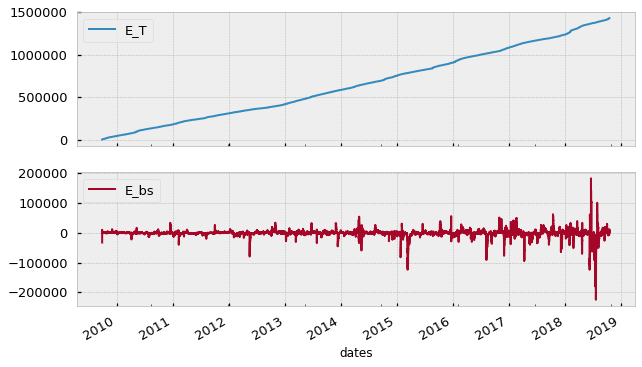

In [53]:
df0[['E_T','E_bs']].plot(subplots=True, figsize=(10,6));

In [54]:
display(df0.describe()/1000)

,bs,E_T,E_bs,absMul,absTheta
count,1430.997000,1430.997000,1430.997000,1.430997e+03,1.430997e+03
mean,-0.875928,714.070352,-0.878093,5.447968e+06,3.336754e+05
std,674.942672,413.089337,12.859053,1.404332e+07,3.285227e+05
min,-244194.944400,0.000000,-224.802879,0.000000e+00,3.537070e-01
25%,-19.514822,356.319000,-2.801518,4.509744e+05,4.802755e+04
50%,-4.970000,714.068000,-0.089950,1.651225e+06,1.332114e+05
75%,19.300000,1071.817000,2.641304,4.886528e+06,5.943405e+05
max,289491.800000,1429.566000,183.330445,3.096084e+08,1.401899e+06


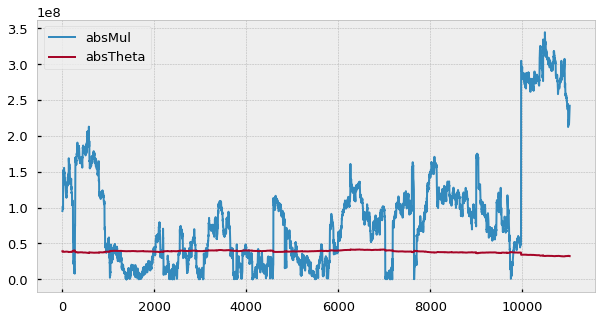

In [55]:
(df0.loc['2010-06',['absMul','absTheta']]
 .reset_index(drop=True)
 .plot(figsize=(10,5)))

In [56]:
def test_t_abs(absTheta,t,E_bs):
    """
    Bool function to test inequality
    *row is assumed to come from df.itertuples()
    -absTheta: float(), row.absTheta
    -t: pd.Timestamp()
    -E_bs: float(), row.E_bs
    """
    return (absTheta >= t*E_bs)

def agg_imbalance_bars(df):
    """
    Implements the accumulation logic
    """
    start = df.index[0]  
    bars = []
    for row in tqdm(df.itertuples()):
        t_abs = row.absTheta
        rowIdx = row.Index
        E_bs = row.E_bs
        
        t = df.loc[start:rowIdx].shape[0]
        if t<1: t=1 # if t lt 1 set equal to 1
        if test_t_abs(t_abs,t,E_bs):
            bars.append((start,rowIdx,t))
            start = rowIdx
    return bars

In [60]:
bars = agg_imbalance_bars(df0)
test_imb_bars = (pd.DataFrame(bars,columns=['start','stop','Ts'])
                 .drop_duplicates())
cprint(test_imb_bars)


0it [00:00, ?it/s]
1it [00:00,  9.02it/s]
555it [00:00, 12.88it/s]
1121it [00:00, 18.38it/s]
1687it [00:00, 26.23it/s]
2202it [00:00, 37.39it/s]
2781it [00:00, 53.26it/s]
3329it [00:00, 75.77it/s]
3885it [00:00, 107.61it/s]
4439it [00:00, 152.46it/s]
5000it [00:01, 215.30it/s]
5569it [00:01, 302.66it/s]
6114it [00:01, 421.37it/s]
6663it [00:01, 582.79it/s]
7204it [00:01, 795.79it/s]
7788it [00:01, 1074.10it/s]
8340it [00:01, 1410.89it/s]
8918it [00:01, 1824.65it/s]
9472it [00:01, 2279.53it/s]
10024it [00:01, 2744.03it/s]
10619it [00:02, 3272.55it/s]
11241it [00:02, 3814.28it/s]
11871it [00:02, 4325.59it/s]
12482it [00:02, 4740.26it/s]
13090it [00:02, 5075.06it/s]
13703it [00:02, 5350.21it/s]
14334it [00:02, 5604.70it/s]
14947it [00:02, 5737.82it/s]
15584it [00:02, 5913.40it/s]
16213it [00:02, 6020.67it/s]
16835it [00:03, 5998.09it/s]
17455it [00:03, 6056.70it/s]
18094it [00:03, 6151.08it/s]
18731it [00:03, 6213.04it/s]
19358it [00:03, 6173.68it/s]
19980it [00:03, 6006.56it/s]
20585it 

298834it [00:52, 4877.02it/s]
299406it [00:52, 5101.78it/s]
300001it [00:52, 5276.96it/s]
300574it [00:52, 5403.95it/s]
301120it [00:53, 5022.82it/s]
301632it [00:53, 4911.02it/s]
302130it [00:53, 4760.98it/s]
302632it [00:53, 4834.40it/s]
303142it [00:53, 4911.03it/s]
303637it [00:53, 4666.85it/s]
304109it [00:53, 4649.44it/s]
304578it [00:53, 4591.86it/s]
305040it [00:53, 4575.06it/s]
305510it [00:54, 4611.22it/s]
306026it [00:54, 4762.09it/s]
306505it [00:54, 4671.16it/s]
306987it [00:54, 4714.06it/s]
307464it [00:54, 4729.13it/s]
307959it [00:54, 4792.29it/s]
308460it [00:54, 4854.76it/s]
308947it [00:54, 4835.04it/s]
309439it [00:54, 4858.84it/s]
309926it [00:54, 4808.35it/s]
310408it [00:55, 4618.32it/s]
310872it [00:55, 4580.34it/s]
311332it [00:55, 4512.77it/s]
311785it [00:55, 4468.83it/s]
312257it [00:55, 4540.27it/s]
312724it [00:55, 4578.36it/s]
313183it [00:55, 4570.32it/s]
313716it [00:55, 4773.17it/s]
314335it [00:55, 5123.76it/s]
314960it [00:55, 5416.50it/s]
315589it [

595594it [01:44, 5511.78it/s]
596148it [01:44, 5517.86it/s]
596734it [01:44, 5615.58it/s]
597360it [01:44, 5793.24it/s]
597995it [01:44, 5949.67it/s]
598596it [01:44, 5965.63it/s]
599222it [01:44, 6050.74it/s]
599830it [01:44, 6059.19it/s]
600438it [01:45, 6045.33it/s]
601063it [01:45, 6105.21it/s]
601693it [01:45, 6161.48it/s]
602310it [01:45, 5993.78it/s]
602911it [01:45, 5836.99it/s]
603497it [01:45, 5310.84it/s]
604039it [01:45, 5155.37it/s]
604563it [01:45, 5109.17it/s]
605080it [01:45, 4868.06it/s]
605581it [01:46, 4908.02it/s]
606095it [01:46, 4974.99it/s]
606596it [01:46, 4980.20it/s]
607097it [01:46, 4822.62it/s]
607607it [01:46, 4901.71it/s]
608121it [01:46, 4970.32it/s]
608718it [01:46, 5232.95it/s]
609325it [01:46, 5458.62it/s]
609923it [01:46, 5602.95it/s]
610489it [01:47, 5605.43it/s]
611054it [01:47, 5273.31it/s]
611588it [01:47, 5053.02it/s]
612100it [01:47, 4946.41it/s]
612600it [01:47, 4919.37it/s]
613096it [01:47, 4844.31it/s]
613584it [01:47, 4797.45it/s]
614066it [

882176it [02:35, 6087.37it/s]
882786it [02:36, 6009.72it/s]
883394it [02:36, 6030.52it/s]
884030it [02:36, 6125.28it/s]
884654it [02:36, 6157.93it/s]
885271it [02:36, 6137.96it/s]
885886it [02:36, 6101.21it/s]
886497it [02:36, 6011.89it/s]
887099it [02:36, 6008.09it/s]
887703it [02:36, 6015.27it/s]
888332it [02:36, 6095.05it/s]
888960it [02:37, 6148.69it/s]
889598it [02:37, 6215.11it/s]
890220it [02:37, 6103.46it/s]
890856it [02:37, 6175.74it/s]
891509it [02:37, 6276.80it/s]
892138it [02:37, 6239.58it/s]
892771it [02:37, 6265.86it/s]
893407it [02:37, 6291.44it/s]
894039it [02:37, 6298.85it/s]
894670it [02:37, 6256.44it/s]
895296it [02:38, 6162.59it/s]
895932it [02:38, 6219.85it/s]
896555it [02:38, 6207.92it/s]
897177it [02:38, 6193.19it/s]
897797it [02:38, 6185.28it/s]
898416it [02:38, 6117.88it/s]
899029it [02:38, 6112.38it/s]
899641it [02:38, 6100.91it/s]
900252it [02:38, 5985.52it/s]
900852it [02:38, 5908.99it/s]
901444it [02:39, 5767.25it/s]
902022it [02:39, 5439.24it/s]
902574it [

1177161it [03:26, 6088.79it/s]
1177771it [03:26, 5924.62it/s]
1178387it [03:26, 5992.40it/s]
1179016it [03:26, 6076.34it/s]
1179647it [03:26, 6142.17it/s]
1180263it [03:26, 5913.69it/s]
1180895it [03:26, 6027.52it/s]
1181526it [03:26, 6108.17it/s]
1182163it [03:27, 6183.94it/s]
1182788it [03:27, 6202.17it/s]
1183423it [03:27, 6244.41it/s]
1184049it [03:27, 6225.11it/s]
1184675it [03:27, 6233.24it/s]
1185308it [03:27, 6260.33it/s]
1185940it [03:27, 6276.36it/s]
1186584it [03:27, 6323.50it/s]
1187217it [03:27, 6280.65it/s]
1187846it [03:27, 6265.70it/s]
1188478it [03:28, 6281.41it/s]
1189107it [03:28, 6249.37it/s]
1189741it [03:28, 6274.92it/s]
1190369it [03:28, 6118.30it/s]
1191003it [03:28, 6181.14it/s]
1191622it [03:28, 6163.83it/s]
1192239it [03:28, 6138.44it/s]
1192854it [03:28, 6042.38it/s]
1193474it [03:28, 6086.72it/s]
1194084it [03:28, 6060.53it/s]
1194691it [03:29, 6048.95it/s]
1195331it [03:29, 6148.23it/s]
1195963it [03:29, 6196.74it/s]
1196584it [03:29, 6097.60it/s]
1197195i

-------------------------------------------------------------------------------
dataframe information
-------------------------------------------------------------------------------
                      start                stop  Ts
1430964 2018-10-19 15:59:59 2018-10-19 15:59:59   4
1430967 2018-10-19 15:59:59 2018-10-19 16:00:00   5
1430968 2018-10-19 16:00:00 2018-10-19 16:10:00   2
1430969 2018-10-19 16:10:00 2018-10-19 18:30:00   2
1430970 2018-10-19 18:30:00 2018-10-19 20:00:00   2
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1220591 entries, 0 to 1430970
Data columns (total 3 columns):
start    1220591 non-null datetime64[ns]
stop     1220591 non-null datetime64[ns]
Ts       1220591 non-null int64
dtypes: datetime64[ns](2), int64(1)
memory usage: 37.2 MB
None
-------------------------------------------------------------------------------



In [61]:
test_imb_bars.Ts.describe().round()

count    1220591.0
mean           3.0
std            2.0
min            1.0
25%            2.0
50%            2.0
75%            3.0
max          139.0
Name: Ts, dtype: float64

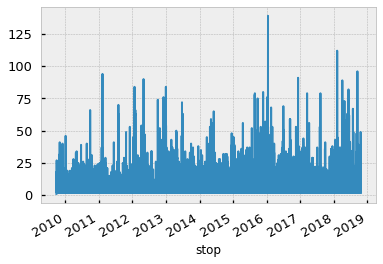

In [63]:
test_imb_bars.set_index('stop')['Ts'].plot()

In [76]:
dvImbBars = df.loc[test_imb_bars.stop].drop_duplicates()
cprint(dvImbBars)

-------------------------------------------------------------------------------
dataframe information
-------------------------------------------------------------------------------
                      price     bid     ask   size      v          dv
dates                                                                
2018-10-19 15:59:59  111.96  111.95  111.96    900    900   100764.00
2018-10-19 16:00:00  111.97  111.95  111.96  12439  12439  1392794.83
2018-10-19 16:10:00  111.97  111.31  112.10      0      0        0.00
2018-10-19 18:30:00  111.97  110.70  112.40      0      0        0.00
2018-10-19 20:00:00  111.97  110.81  112.40      0      0        0.00
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1430992 entries, 2009-09-28 09:30:00 to 2018-10-19 20:00:00
Data columns (total 6 columns):
price    1430992 non-null float64
bid      1430992 non-null float64
ask      1430992 non-null float64
size     1430992 non-null int6

In [77]:
outfp = PurePath(data_dir/'processed'/'dv_imbalanced_bars.parq')
dvImbBars.to_parquet(outfp)

In [79]:
dvBar = dv_bar_df.price
cprint(dvBar)

-------------------------------------------------------------------------------
dataframe information
-------------------------------------------------------------------------------
                      price
dates                      
2018-10-19 15:57:50  112.09
2018-10-19 15:59:07  112.01
2018-10-19 15:59:37  111.96
2018-10-19 15:59:58  111.97
2018-10-19 16:00:00  111.97
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 51439 entries, 2009-09-28 09:46:35 to 2018-10-19 16:00:00
Data columns (total 1 columns):
price    51439 non-null float64
dtypes: float64(1)
memory usage: 3.3 MB
None
-------------------------------------------------------------------------------



In [80]:
dr = returns(dv_bar_df.price)
drImb = returns(dvImbBars)

ValueError: Length of passed values is 1430992, index implies 1430991

In [81]:
bar_types = ['dvBar','dvImb']
bar_rets = [dr, drImb]

get_test_stats(bar_types,bar_rets,pd.Series.autocorr)

,sample_size,autocorr_stat
dvBar,51438.0,-0.122732
dvImb,265963.0,-0.075294


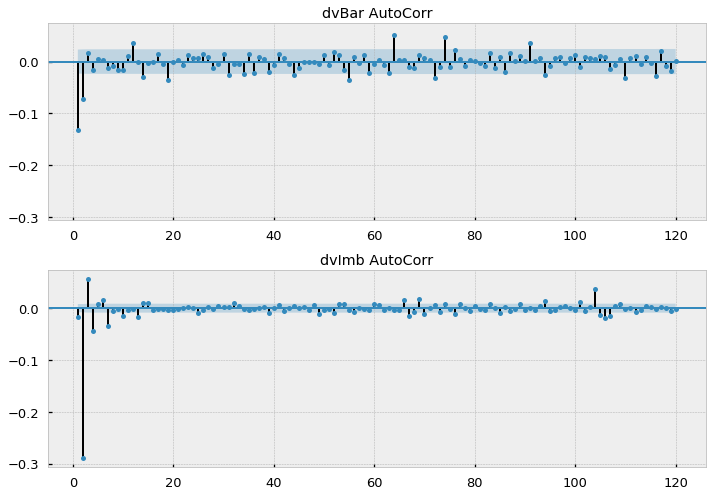

In [82]:
plot_autocorr(bar_types,bar_returns)

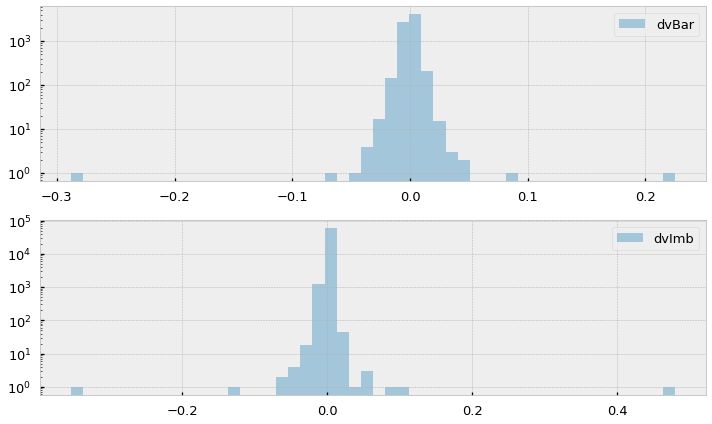

In [83]:
plot_hist(bar_types,bar_returns)

In [84]:
jbs = get_test_stats(bar_types,bar_returns,jb).sort_values('jb_stat')
shaps = (get_test_stats(bar_types,bar_returns,shapiro)
         .sort_values('shapiro_stat')[::-1])

display(jbs,shaps)

,sample_size,jb_stat
dvBar,7153.0,1.127301e+08
dvImb,60864.0,3.349965e+11


,sample_size,shapiro_stat
dvBar,7153.0,0.592870
dvImb,60864.0,0.284183


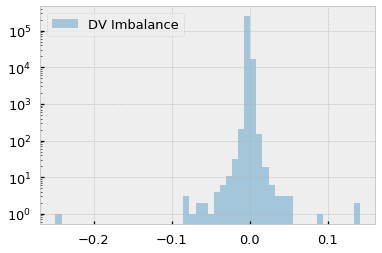

In [85]:
f, ax = plt.subplots()
ax.set(yscale='log')
sns.distplot(drImb[np.isfinite(drImb)].dropna(),
             ax=ax, kde=False, label='DV Imbalance')
ax.legend()